In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
co2 = pd.read_csv("C:/Users/HP/Downloads/CO2_emission.csv")
co2.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [4]:
co2.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [5]:
#vehicle classes that emit the most and least co2 on average
avg_emissions_by_class = co2.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values()

print("Lowest emitting vehicle classes:")
print(avg_emissions_by_class.head())

print("\nHighest emitting vehicle classes:")
print(avg_emissions_by_class.tail())

Lowest emitting vehicle classes:
Vehicle_Class
Station wagon: Small    191.300000
Compact                 211.939759
Mid-size                228.280702
Minivan                 229.571429
SUV: Small              231.598958
Name: CO2_Emissions, dtype: float64

Highest emitting vehicle classes:
Vehicle_Class
Station wagon: Mid-size    287.444444
SUV: Standard              303.874016
Two-seater                 304.553571
Pickup truck: Standard     305.373913
Van: Passenger             336.750000
Name: CO2_Emissions, dtype: float64


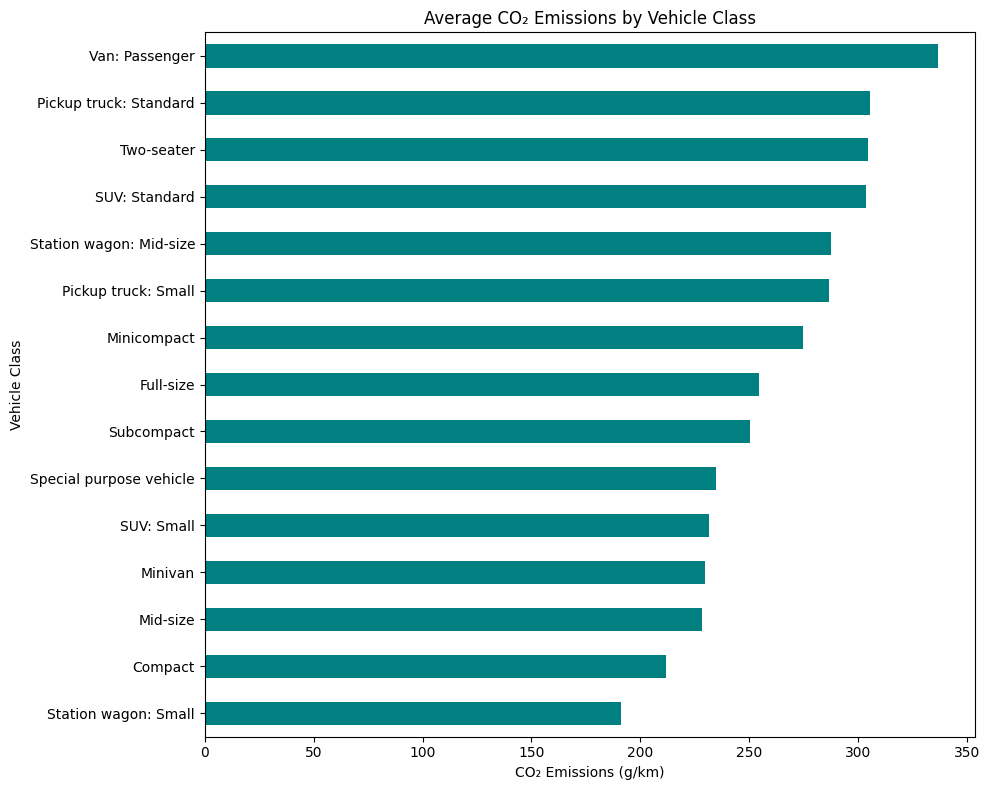

In [6]:
import matplotlib.pyplot as plt

avg_emissions_by_class.plot(kind='barh', figsize=(10, 8), color='teal')
plt.title('Average CO₂ Emissions by Vehicle Class')
plt.xlabel('CO₂ Emissions (g/km)')
plt.ylabel('Vehicle Class')
plt.tight_layout()
plt.show()

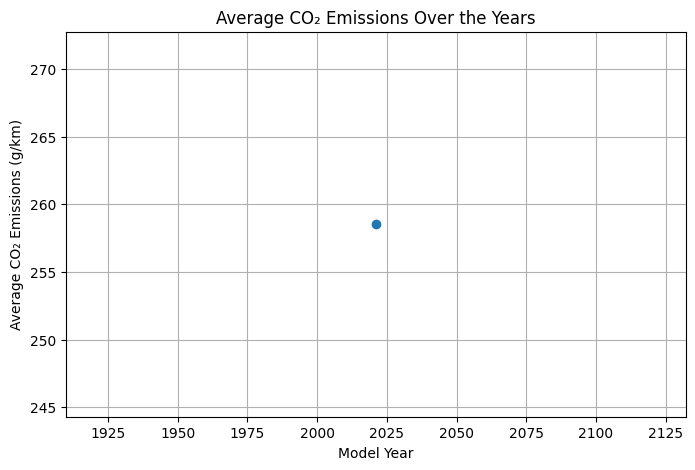

In [7]:
#how co2 emissions have changed over the years
emission_trend = co2.groupby('Model_Year')['CO2_Emissions'].mean()

emission_trend.plot(marker='o', figsize=(8, 5))
plt.title('Average CO₂ Emissions Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Average CO₂ Emissions (g/km)')
plt.grid(True)
plt.show()

In [8]:
#how smog level correlates with co2 emissions and fuel consumption
correlation = co2[['Smog_Level', 'CO2_Emissions', 'Fuel_Consumption_comb(L/100km)']].corr()
print(correlation)

                                Smog_Level  CO2_Emissions  \
Smog_Level                        1.000000      -0.583690   
CO2_Emissions                    -0.583690       1.000000   
Fuel_Consumption_comb(L/100km)   -0.555426       0.971241   

                                Fuel_Consumption_comb(L/100km)  
Smog_Level                                           -0.555426  
CO2_Emissions                                         0.971241  
Fuel_Consumption_comb(L/100km)                        1.000000  


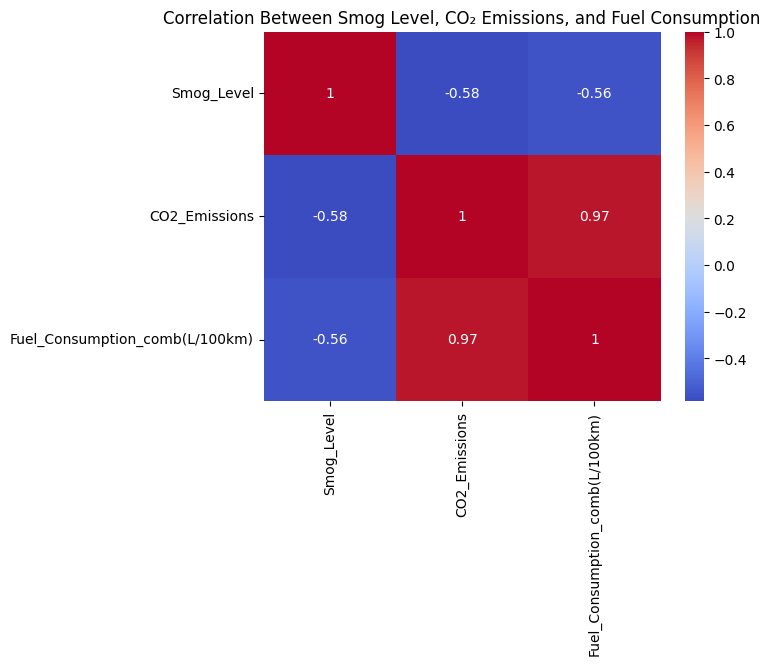

In [9]:
import seaborn as sns

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Smog Level, CO₂ Emissions, and Fuel Consumption')
plt.show()


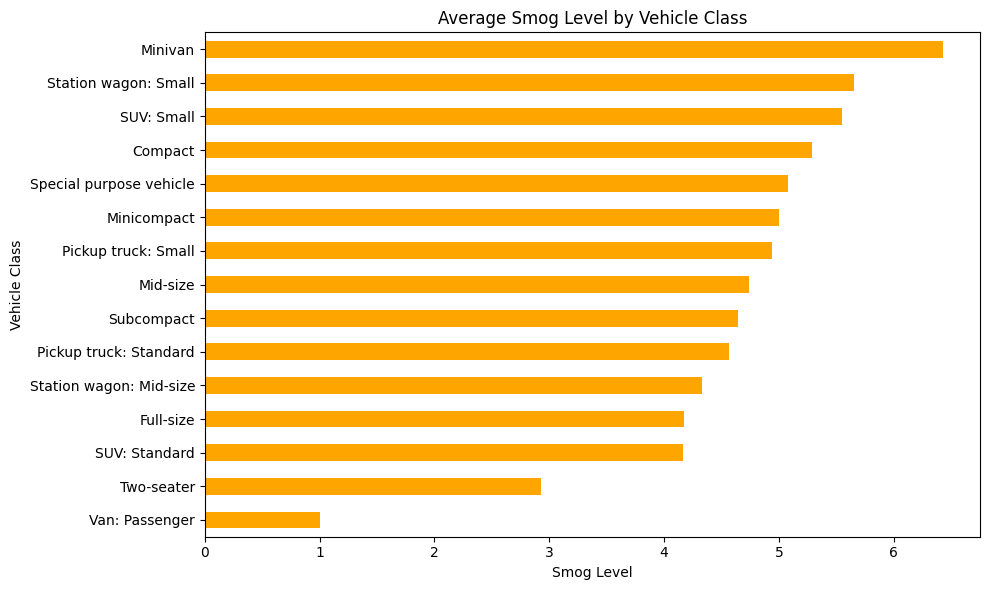

In [10]:
# what is the distribution of smog levels across vehicle classes
smog_by_class = co2.groupby('Vehicle_Class')['Smog_Level'].mean().sort_values()

smog_by_class.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Average Smog Level by Vehicle Class')
plt.xlabel('Smog Level')
plt.ylabel('Vehicle Class')
plt.tight_layout()
plt.show()


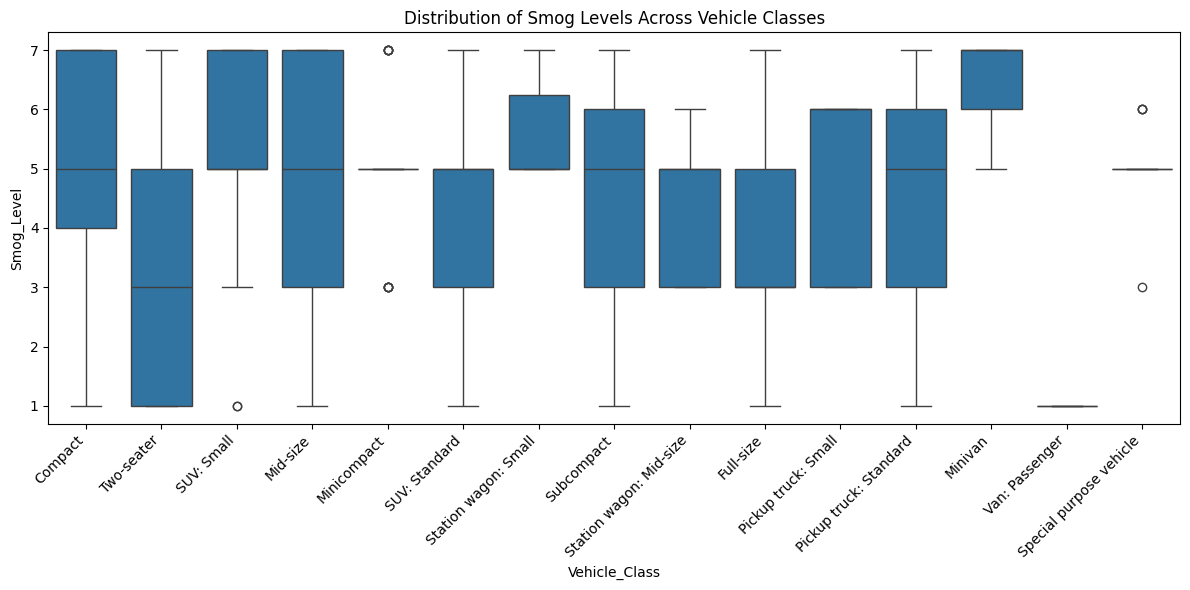

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle_Class', y='Smog_Level', data=co2)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Smog Levels Across Vehicle Classes')
plt.tight_layout()
plt.show()